### Confusion Matrix and ROC

Let us consider an application of logistic regression involving a direct mail promotion being used by Simmons Stores.

Simmons owns and operates a national chain of women's apparel stores.

5000 copies of an expensive 4-color sales catalog have been printed, and each catalog includes a coupon that provides a $50 discount on purchases of $200 or more.

The catalogs are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.

Management thinks that annual spending at Simmons stores and whether a customer has a Simmons credit card are two variables that might be helpful in predicting whether a customer who receives the catalog will use the coupon.

Simmons conducted a pilot study using a random sample of 50 Simmons credit card customers and 50 other customers who do not have a Simmons credit card.

Simmons sent the catalog to each of the 100 customers selected.

At the end of a test period, Simmons noted whether the customer used the coupon or not?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Data Files/Simmons.xlsx')
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [3]:
# It is used to get some statistical detail
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [4]:
# It gives unique value in particular column
data['Coupon'].unique()

array([0, 1], dtype=int64)

In [5]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
x = data[['Card', 'Spending']]
y = data['Coupon'].values.reshape(-1, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

In [10]:
Lreg = LogisticRegression(solver='lbfgs')
Lreg.fit(x_train, y_train.ravel())   
# ravel() will return 1D array with all the input-array elements

LogisticRegression()

In [11]:
y_predict = Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [12]:
y_predict_train = Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [13]:
y_prob_train = Lreg.predict_proba(x_train)[:, 1]
y_prob_train.reshape(1, -1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [14]:
y_prob = Lreg.predict_proba(x_test)[:, 1]
y_prob.reshape(1, -1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [15]:
x = data[['Spending', 'Card']]
y = data['Coupon']

In [16]:
import statsmodels.api as sm 
x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Mar 2022   Pseudo R-squ.:                  0.1012
Time:                        11:19:39   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
Card           1.0987      0.445      2.471      0.013       0.227       1.970
==============================================================================
"""

#### Calculating Accuracy Score using Confusion Matrix

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.76

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

In [20]:
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [22]:
Accuracy = (tp + tn)/(tp + fp + fn + tn)
print('Accuracy {:0.2f}'.format(Accuracy))

Accuracy 0.76


In [23]:
Specificity = tn/(tn + fp)
print('Specificity {:0.2f}'.format(Specificity))

Specificity 0.94


In [24]:
Sensitivity = tp/(tp + fn)
print('Sensitivity {:0.2f}'.format(Sensitivity))

Sensitivity 0.44


#### ROC curve for Training Dataset

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

log_ROC_AUC1 = roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1, tpr1)

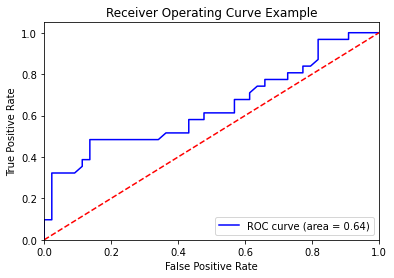

In [26]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve Example')
plt.legend(loc='lower right')
plt.show()

#### ROC Curve for Test Dataset

In [27]:
log_ROC_AUC = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

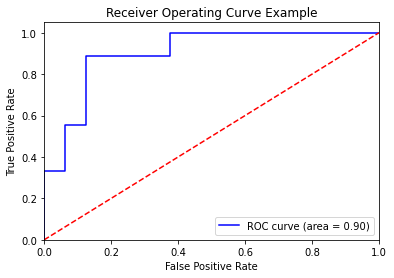

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve Example')
plt.legend(loc='lower right')
plt.show()

#### Accuracy checking for different threshold values

In [29]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1, -1), threshold=0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [30]:
# Converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [31]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_class1).ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  8
False Positives:  8
False Negatives:  0
True Positives:  9


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



In [34]:
from sklearn.preprocessing import binarize
y_predict_class2 = binarize(y_prob.reshape(1, -1), threshold=0.50)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [35]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [36]:
print(classification_report(y_test, y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [37]:
y_predict_class3 = binarize(y_prob.reshape(1, -1), threshold=0.70)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
confusion_matrix_4 = confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [39]:
print(classification_report(y_test, y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\rpchi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpchi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpchi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Calculating Optimal Threshold Value

In [40]:
from sklearn.metrics import roc_curve, auc

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [42]:
print('Area under ROC Curve: %f' % roc_auc)

Area under ROC Curve: 0.902778


In [43]:
import numpy as np

i = np.arange(len(tpr))     # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i), 'tpr' : pd.Series(tpr, index=i), '1-fpr' : pd.Series(1 - fpr, index=i), 'tf' : pd.Series(tpr - (1 - fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})

roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


#### Optimal Threshold value in ROC Curve

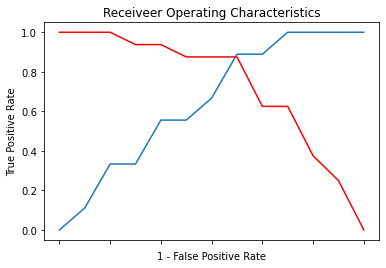

In [44]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color='red')
plt.xlabel('1 - False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiveer Operating Characteristics')
ax.set_xticklabels({})
plt.show()

In [45]:
y_predict_class4 = binarize(y_prob.reshape(1, -1), threshold=0.45)[0]
y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [46]:
confusion_matrix_5 = confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [47]:
print(classification_report(y_test, y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25



### Regression Analysis Model Building

##### Modelling Curvilinear Relationships

To illustrate, let us consider the problem facing Reynolds, Inc., a manufacturer of industrial scales and laboratory equipment.

Managers at Reynolds want to investigate the relationship between length of employment of their salespeople and the number of electronic laboratory scales sold.

Table in the next slide gives the number of scales sold by 15 randomly selected salespeople for the most recent sales period and the number of months each salesperson has been employed by the firm.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [49]:
tbl1 = pd.read_excel('Data Files/Reynolds.xlsx')
tbl1

,ScalesSold,MonthsEmployed
0,275,41
1,296,106
2,317,76
3,376,104
4,162,22
5,150,12
6,367,85
7,308,111
8,189,40
9,235,51


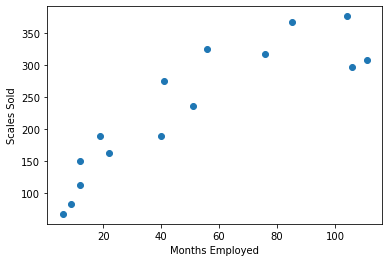

In [50]:
plt.scatter(tbl1['MonthsEmployed'], tbl1['ScalesSold'])
plt.ylabel('Scales Sold')
plt.xlabel('Months Employed')
plt.show()

In [51]:
x = tbl1['MonthsEmployed']
y = tbl1['ScalesSold']
x2 = sm.add_constant(x)
model = sm.OLS(y, x2).fit()

model.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     46.41
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           1.24e-05
Time:                        11:19:44   Log-Likelihood:                -78.745
No. Observations:                  15   AIC:                             161.5
Df Residuals:                      13   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            111.2279     21.628      5.143      0.000      64.503     157.952
MonthsEmployed     2.3768      0.349      6.812      0.000       1.623       3.131
==============================================================================
Omnibus:                        1.043   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.723
Skew:                           0.052   Prob(JB):                        0.697
Kurtosis:                       1.930   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
E = model.resid_pearson
E

array([ 1.33945744, -1.35645713,  0.50765989,  0.35518943, -0.03063607,
        0.20702037,  1.08543558, -1.35411191, -0.34936157,  0.05163116,
       -1.00208207, -0.56041143, -1.18121025,  1.62923113,  0.65864542])

In [53]:
yhat = model.predict(x2)
yhat

0     208.675693
1     363.166061
2     291.862814
3     358.412511
4     163.516970
5     139.749221
6     313.253788
7     375.049935
8     206.298918
9     232.443442
10    132.618896
11    139.749221
12    125.488571
13    244.327316
14    156.386645
dtype: float64

#### Standard residual plot

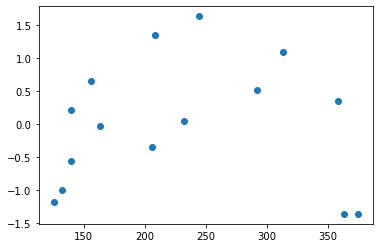

In [54]:
plt.scatter(yhat, E)
plt.show()

In [55]:
x_sq = (x ** 2)
x_sq

0      1681
1     11236
2      5776
3     10816
4       484
5       144
6      7225
7     12321
8      1600
9      2601
10       81
11      144
12       36
13     3136
14      361
Name: MonthsEmployed, dtype: int64

In [56]:
x_new = np.column_stack((x, x_sq))
x_new2 = sm.add_constant(x_new)
model2 = sm.OLS(y, x_new2).fit()

model2.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ScalesSold   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     55.36
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           8.75e-07
Time:                        11:19:45   Log-Likelihood:                -72.704
No. Observations:                  15   AIC:                             151.4
Df Residuals:                      12   BIC:                             153.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3476     22.775      1.991      0.070      -4.274      94.969
x1             6.3448      1.058      5.998      0.000       4.040       8.650
x2            -0.0345      0.009     -3.854      0.002      -0.054      -0.015
==============================================================================
Omnibus:                        2.162   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                1.003
Skew:                          -0.126   Prob(JB):                        0.606
Kurtosis:                       1.758   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
E2 = model2.resid_pearson
E2

array([ 0.797777  , -0.99895952, -0.32984543,  1.27097898, -0.18118441,
        0.97178443,  0.91436152, -0.48542046, -1.59531168, -1.28395183,
       -0.48348828, -0.13117488, -0.44045635,  0.94303218,  1.03185873])

In [58]:
yhat2 = model2.predict(x_new2)
yhat2

array([247.5143749 , 330.41691942, 328.36408757, 332.21125762,
       168.24230429, 116.51933758, 335.49771571, 324.72407789,
       243.96290147, 279.23569304,  99.65750913, 116.51933758,
        82.17493987, 292.50993204, 153.44961189])

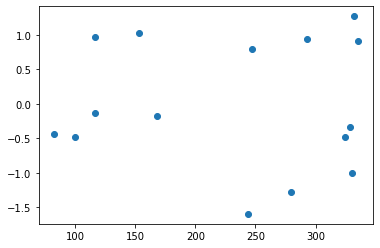

In [59]:
plt.scatter(yhat2, E2)
plt.show()

### Regression Analysis Model Building (Interaction)

A company introduces a new shampoo product.

Two factors believed to have the most influence on sales are unit selling price and advertising expenditure.

To investigate the effects of these two variables on sales, prices of $2.00, $2.50, and $300 were paired with advertising expenditures of $50,000 and $100,000 in 24 test markets.

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [61]:
tbl1 = pd.read_excel('Data Files/Tyler.xlsx')
tbl1.head()

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


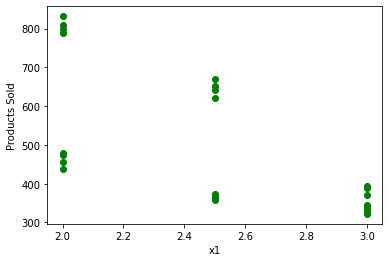

In [62]:
plt.scatter(tbl1['Price'], tbl1['Sales(1000s)'], color='green')
plt.ylabel('Products Sold')
plt.xlabel('x1')
plt.show()

In [63]:
z1 = tbl1['AdvertisingExpenditure($1000s)']
z2 = tbl1['Price']
z3 = z1 * z2

In [64]:
x_new = np.column_stack((z1, z2, z3))
y = tbl1['Sales(1000s)']
x_new2 = sm.add_constant(x_new)

In [65]:
model2 = sm.OLS(y, x_new2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           9.26e-17
Time:                        11:19:46   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.024    -511.218     -40.449
x1            19.6800      1.427     13.788      0.000      16.703      22.657
x2           175.0000     44.547      3.928      0.001      82.077     267.923
x3            -6.0800      0.563    -10.790      0.000      -7.255      -4.905
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   2.842
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.565
Skew:                           0.335   Prob(JB):                        0.754
Kurtosis:                       2.661   Cond. No.                     4.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sales = -276.8333 + 175 * Price + 19.68 * AdvExp - 6.08 * Price * AdvExp 

#### Transformations involving the Dependent Variable

In [66]:
tbl2 = pd.read_excel('Data Files/MPG.xlsx')
tbl2

,MilesperGallon,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026
5,26.4,2702
6,23.9,2657
7,30.5,2106
8,18.1,3226
9,19.5,3213


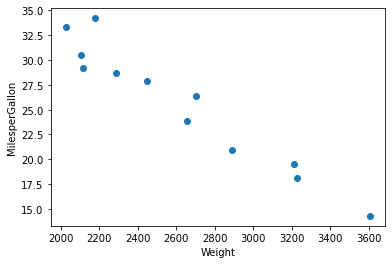

In [67]:
plt.scatter(tbl2['Weight'], tbl2['MilesperGallon'])
plt.ylabel('MilesperGallon')
plt.xlabel('Weight')
plt.show()

In [68]:
x = tbl2['Weight']
y = tbl2['MilesperGallon']
x2 = sm.add_constant(x)

model = sm.OLS(y, x2).fit()
model.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MilesperGallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           2.85e-07
Time:                        11:19:47   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.000      50.342      61.849
Weight        -0.0116      0.001    -12.032      0.000      -0.014      -0.009
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                0.951
Skew:                           0.690   Prob(JB):                        0.621
Kurtosis:                       3.025   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
E = model.resid_pearson
E

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [70]:
yhat = model.predict(x2)
yhat

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

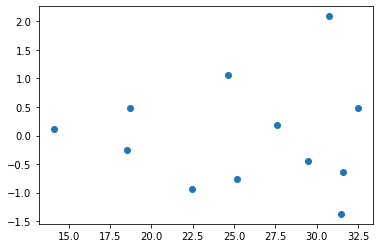

In [71]:
plt.scatter(yhat, E)
plt.show()

In [72]:
Y = np.log(y)

In [73]:
model2 = sm.OLS(Y, x2).fit()
model2.summary()

C:\Users\rpchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MilesperGallon   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           9.84e-08
Time:                        11:19:48   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.000       4.303       4.746
Weight        -0.0005   3.72e-05    -13.462      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.779
Skew:                           0.484   Prob(JB):                        0.677
Kurtosis:                       2.211   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
E2 = model2.resid_pearson
E2

array([-0.31630114, -1.42005514,  1.5623004 ,  0.48370101, -0.0537228 ,
        1.60448776, -0.29474869, -0.79674991, -0.18335787,  0.87474775,
       -0.87956572, -0.58073564])

In [75]:
yhat2 = model2.predict(x2)
yhat2

0     3.377221
1     3.465414
2     3.431840
3     3.297547
4     3.509009
5     3.170268
6     3.192817
7     3.468922
8     2.907694
9     2.914208
10    2.716776
11    3.077064
dtype: float64

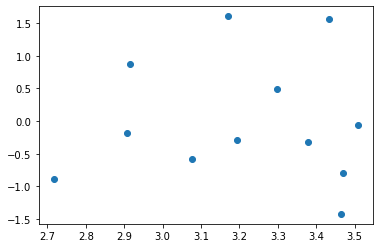

In [76]:
plt.scatter(yhat2, E2)
plt.show()